# IIR Filter Design Midsem Assignment
Name : Prajwal Nayak \\
Roll Number : 22B4246 \\

Reviewers:
1. Aman Rishal C H (22B3914)
2. Shikhar Ashutosh Moondra (22B0688)
3. Sarvadnya Purkar (22B4232)


Given Specifications:
1. Filter Number (M): 114
2. Given that sampling frequency $f_s$ = 630kHz
3. We have to design FILTER TYPE II : where passband is equiripple and stopband is monotonic => we are designing a chebyschev filter.
4. Tolerances : $δ_1$ = $δ_2$ = 0.15
5. Transition Band : 5kHz on either side of each passband.
6. To find ranges of passband, M = 11Q + R. Q = M//11 and R = M % 10. D for Group I bands is Q and for Group II is R.
7. Group I of Frequency Bands: The frequency band in this group is (40 + 5𝐷) 𝑡𝑜 (70 + 5𝐷)
8. Group II of Frequency Bands: The frequency band in this group is (170 + 5𝐷) 𝑡𝑜 (200 + 5𝐷)

In [1]:
M = 114
Q = M//11
R = M%10
print("The value of Q is: ",Q)
print("The value of R is: ",R)

The value of Q is:  10
The value of R is:  4


In [2]:
print("Group I frequency band range is from",40+5*(Q),"to",70+5*(Q))
print("Group II frequency band range is from",170+5*(R),"to",200+5*(R))

Group I frequency band range is from 90 to 120
Group II frequency band range is from 190 to 220


In [3]:
print("Transition band for Group I frequency band is",40+5*(Q)-5,"to",40+5*(Q)," and ",70+5*(Q),"to",70+5*(Q)+5)
print("Transition band for Group II frequency band is",170+5*(R)-5,"to",170+5*(R)," and ",200+5*(R),"to",200+5*(R)+5)

Transition band for Group I frequency band is 85 to 90  and  120 to 125
Transition band for Group II frequency band is 185 to 190  and  220 to 225


##Bilinear Transformation
$s = \frac{1-z^{-1}}{1+z^{-1}}$ \\
For $z = e^{jω}$, we get $s = j tan(ω/2)$ \\
For $s = jΩ$, we get $Ω = tan(ω/2)$


I am planning to make this filter by using Cascade of one bandpass and one bandstop filter. We need to make sure the tolerances are right. We cascade the systems means we are multiplying the frequency responses, so the tolerance of 0.15 for each of the bandpass and bandstop would ensure 0.15 tolerance for the resutling filter, actually it would turn out to be better.

In [4]:
import math
f = [0,85,90,120,125,185,190,220,225,315]
w = []
Omega = []
for i in f:
  print("for f = ",i,", we have w = ",(2*math.pi*i)/630,"and Analog Angular frequency is ",(math.tan((2*math.pi*i)/(2*630))))
  w.append((2*math.pi*i)/630)
  Omega.append(math.tan((2*math.pi*i)/(2*630)))
w[9] = math.pi
Omega[9] = math.inf
print(w)
print(Omega)

for f =  0 , we have w =  0.0 and Analog Angular frequency is  0.0
for f =  85 , we have w =  0.8477313509686744 and Analog Angular frequency is  0.4512171831783031
for f =  90 , we have w =  0.8975979010256552 and Analog Angular frequency is  0.4815746188075286
for f =  120 , we have w =  1.19679720136754 and Analog Angular frequency is  0.6817884558007686
for f =  125 , we have w =  1.246663751424521 and Analog Angular frequency is  0.7189510382878603
for f =  185 , we have w =  1.8450623521082912 and Analog Angular frequency is  1.3201833136548846
for f =  190 , we have w =  1.8949289021652722 and Analog Angular frequency is  1.3909153012442141
for f =  220 , we have w =  2.1941282025071573 and Analog Angular frequency is  1.9505721632508881
for f =  225 , we have w =  2.243994752564138 and Analog Angular frequency is  2.0765213965723364
for f =  315 , we have w =  3.141592653589793 and Analog Angular frequency is  1.633123935319537e+16
[0.0, 0.8477313509686744, 0.8975979010256552, 

In [5]:
import pandas as pd
data = {
    "Category": ["Stopband for Group 1", "Passband for Group 1", "Stopband intermediate", "Passband for Group 2","Stopband for Group 2"],
    "Type": ["Monotonic","Monotonic","Monotonic","Monotonic","Monotonic"],
    "Un-normalised Frequency(kHz)[f]": ["0-85", "90-120", "125-185","190-220","225-315"],
    "Normalised Frequency(rad/s)[ω]": [f"{w[0]}-{w[1]}", f"{w[2]}-{w[3]}", f"{w[4]}-{w[5]}",f"{w[6]}-{w[7]}",f"{w[8]}-{w[9]}"],
    "Analog Angular Frequency(rad/s)[Ω]":[f"{Omega[0]}-{Omega[1]}",f"{Omega[2]}-{Omega[3]}",f"{Omega[4]}-{Omega[5]}",f"{Omega[6]}-{Omega[7]}",f"{Omega[8]}-{Omega[9]}"]
}
df = pd.DataFrame(data)
df


,Category,Type,Un-normalised Frequency(kHz)[f],Normalised Frequency(rad/s)[ω],Analog Angular Frequency(rad/s)[Ω]
0,Stopband for Group 1,Monotonic,0-85,0.0-0.8477313509686744,0.0-0.4512171831783031
1,Passband for Group 1,Monotonic,90-120,0.8975979010256552-1.19679720136754,0.4815746188075286-0.6817884558007686
2,Stopband intermediate,Monotonic,125-185,1.246663751424521-1.8450623521082912,0.7189510382878603-1.3201833136548846
3,Passband for Group 2,Monotonic,190-220,1.8949289021652722-2.1941282025071573,1.3909153012442141-1.9505721632508881
4,Stopband for Group 2,Monotonic,225-315,2.243994752564138-3.141592653589793,2.0765213965723364-inf


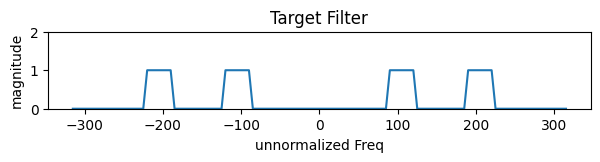

In [6]:
import matplotlib.pyplot as plt
val = [0,0,1,1,0,0,1,1,0,0]
f2 = f[::-1]
val2 = val[::-1]
Omega2 = Omega[::-1]
w2 = w[::-1]
f3=[i*-1 for i in f2]+f
w3=[i*-1 for i in w2]+w
Omega3 = [i*-1 for i in Omega2]+Omega
valNeg = val2+val
plt.figure(figsize=(7,1))
plt.plot(f3, valNeg)
plt.title('Target Filter')
plt.ylim(0,2)
plt.xlabel('unnormalized Freq')
plt.ylabel('magnitude')
plt.show()

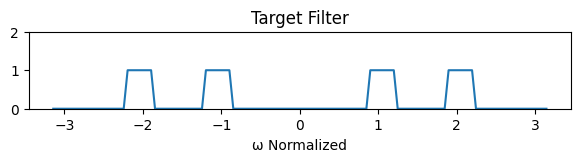

In [7]:
plt.figure(figsize=(7,1))
plt.plot(w3, valNeg)
plt.ylim(0,2)
plt.xlabel('ω Normalized')
plt.title("Target Filter")
plt.show()

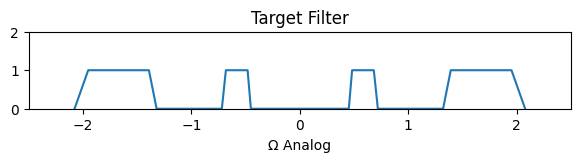

In [8]:
plt.figure(figsize=(7,1))
plt.plot(Omega3, valNeg)
plt.ylim(0,2)
plt.xlim(-2.5,2.5)
plt.xlabel('Ω Analog')
plt.title("Target Filter")
plt.show()

To achieve a multi-bandpass filter, the task can be divided into designing
two separate bandpass filters. The final multi-bandpass filter can then be obtained by cascading
or implementing a parallel combination of the two filters.

# My approach : Cascading Bandpass and Bandstop Filters



In [9]:
print(f3)
print(w3)
print(Omega3)

[-315, -225, -220, -190, -185, -125, -120, -90, -85, 0, 0, 85, 90, 120, 125, 185, 190, 220, 225, 315]
[-3.141592653589793, -2.243994752564138, -2.1941282025071573, -1.8949289021652722, -1.8450623521082912, -1.246663751424521, -1.19679720136754, -0.8975979010256552, -0.8477313509686744, -0.0, 0.0, 0.8477313509686744, 0.8975979010256552, 1.19679720136754, 1.246663751424521, 1.8450623521082912, 1.8949289021652722, 2.1941282025071573, 2.243994752564138, 3.141592653589793]
[-inf, -2.0765213965723364, -1.9505721632508881, -1.3909153012442141, -1.3201833136548846, -0.7189510382878603, -0.6817884558007686, -0.4815746188075286, -0.4512171831783031, -0.0, 0.0, 0.4512171831783031, 0.4815746188075286, 0.6817884558007686, 0.7189510382878603, 1.3201833136548846, 1.3909153012442141, 1.9505721632508881, 2.0765213965723364, inf]


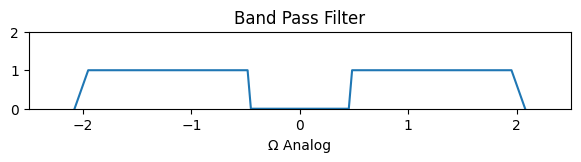

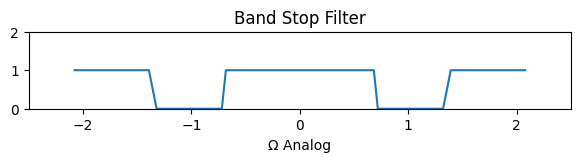

In [10]:
val_pb1=[0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0]
val_pb2=[1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1]
plt.figure(figsize=(7,1))
plt.plot(Omega3,val_pb1)
plt.ylim(0,2)
plt.xlim(-2.5,2.5)
plt.xlabel('Ω Analog')
plt.title("Band Pass Filter")
plt.show()
plt.figure(figsize=(7,1))
plt.plot(Omega3,val_pb2)
plt.ylim(0,2)
plt.xlim(-2.5,2.5)
plt.xlabel('Ω Analog')
plt.title("Band Stop Filter")
plt.show()

$$
H_{\text{final,analog}}(\Omega) = H_{\text{BP,analog}}(\Omega) × H_{\text{BS,analog}}(\Omega)
$$

$$
H_{\text{final}}(e^{j\omega}) = H_{\text{BP}}(e^{j\omega}) × H_{\text{BS}}(e^{j\omega})
$$

$$
h_{\text{final}}[n] = h_{\text{BP}}[n] * h_{\text{BS}}[n]
$$


# BANDPASS FILTER

$Ω_0^2$ = product of passband edges

B = |difference in passband edges|

In [11]:
pb1_p1 = Omega3[12]
pb1_p2 = Omega3[17]
pb1_s1 = Omega3[11]
pb1_s2 = Omega3[18]
pb1_Omega_sq = pb1_p1*pb1_p2
pb1_B = (pb1_p2-pb1_p1)
pb1_ls1 = (pb1_s1**2 - pb1_Omega_sq)/(pb1_B*pb1_s1)
pb1_ls2 = (pb1_s2**2 - pb1_Omega_sq)/(pb1_B*pb1_s2)
print("Omega_sqared = ",pb1_Omega_sq)
print("B = ",pb1_B)
print('Ω LS1=',pb1_ls1)
print('Ω LS2=',pb1_ls2)

Omega_sqared =  0.9393460459741229
B =  1.4689975444433596
Ω LS1= -1.1100001549826586
Ω LS2= 1.1056221221727247


# Tolerance Calculation

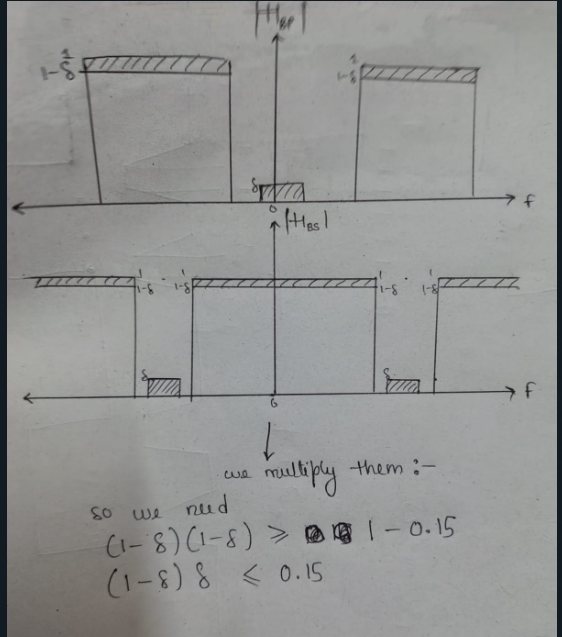

From here we get, $(1-δ)^2 ≥ 1 - 0.15 = 0.85$ (Passband tolerance) and $δ(1-δ) ≤ 0.15$ (Stopband tolerance)

THe first equation gives $1 - δ ≥ \sqrt{0.85}$ which imples that $δ \le \sqrt{0.85}$

So i take tolerance as 0.078 for the individual filters since it satsfies the second equation as well, so that the final filter doesnt cross our filter limits.

We choose minimum of the magnitude of the two LS1 and LS2 as the stopband edge of the lowpass filter.

$D_1 = \frac{1}{(1+δ)^2} - 1 $

$D_2 = \frac{1}{(δ)^2} - 1 $

In [12]:
LP1_stop = min(abs(pb1_ls1),abs(pb1_ls2))
print("stopband edge for Low pass is ",LP1_stop)
LP1_pass = 1
tol = 0.078
D1 = 1/(1-tol)**2 -1
D2 = 1/tol**2 -1
print("The value of D1 is",D1)
print("The value of D2 is",D2)

stopband edge for Low pass is  1.1056221221727247
The value of D1 is 0.1763543367478977
The value of D2 is 163.3655489809336


$$
N \geq \frac{\cosh^{-1} \left( \frac{D_2}{D_1} \right)}{2 \cosh^{-1} \left( \frac{\Omega_S}{\Omega_P} \right)}
$$

We choose N as the smallest integer which satisfies the above condition:

$$
N_{min} = \left\lceil \frac{\cosh^{-1} \sqrt{\frac{D_2}{D_1}}}{\cosh^{-1} \left( \frac{\Omega_s}{\Omega_p} \right)} \right\rceil
$$



In [13]:
import numpy as np
N = int(np.ceil(np.arccosh(np.sqrt(D2/D1))/(np.arccosh(LP1_stop/LP1_pass))))
print('N_min = ',N)

N_min =  10


$ϵ \le \sqrt{D_1}$

In [14]:
Epsilon = math.sqrt(D1) #i chose epsilon as the equality
print("Epsilon =",Epsilon)

Epsilon = 0.4199456354671372


Chebyschev filter equation: using this filter as it has oscillatory behaviour in passband and monotonic in stopband
$$
\left| H_{\text{analog, LPF}}(s) \right|^2 = \frac{1}{1+ϵ^2C_N^2(\frac{s}{j\Omega_p})}
$$



This has poles at the following points as in the code below:

In [15]:
poles = [LP1_pass*math.sin((2*k+1)*np.pi/(2*N))*math.sinh((1/N)*np.arcsinh(1/Epsilon)) + 1j*LP1_pass*math.cos((2*k+1)*np.pi/(2*N))*math.cosh((1/N)*np.arcsinh(1/Epsilon)) for k in range(2*N)]

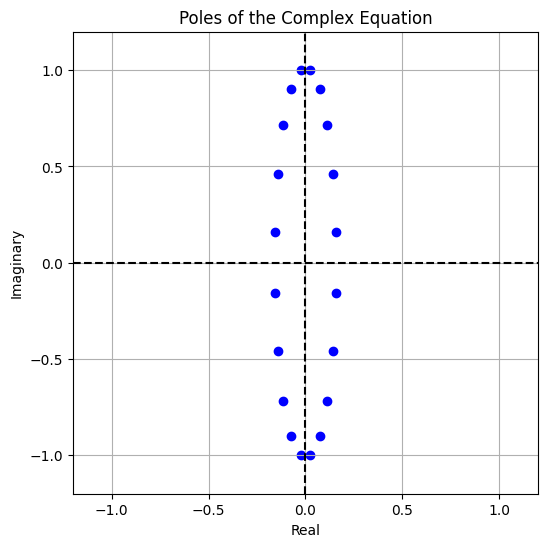

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(np.real(poles), np.imag(poles), color='blue', marker='o')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Poles of the Complex Equation')
plt.grid(True)
plt.show()
stable_poles = [pole for pole in poles if np.real(pole) < 0]

we choose left hand side poles as they are the stable ones.

(0.00465089962853737 + 8.19700210485941e-18*I)/(1.0*s**10 + s**9*(1.02859055531433 + 8.88178419700125e-16*I) + s**8*(3.02899926524092 + 8.88178419700125e-16*I) + s**7*(2.40403742012023 + 4.44089209850063e-15*I) + s**6*(3.19785191054288 + 3.5527136788005e-15*I) + s**5*(1.86956598968533 + 3.33066907387547e-15*I) + s**4*(1.37642479081273 + 1.33226762955019e-15*I) + s**3*(0.536853316668658 + 8.60422844084496e-16*I) + s**2*(0.207750123789674 + 2.98372437868011e-16*I) + s*(0.0414060740830247 + 6.93889390390723e-17*I) + 0.00504435968388001 + 8.89045781438114e-18*I)


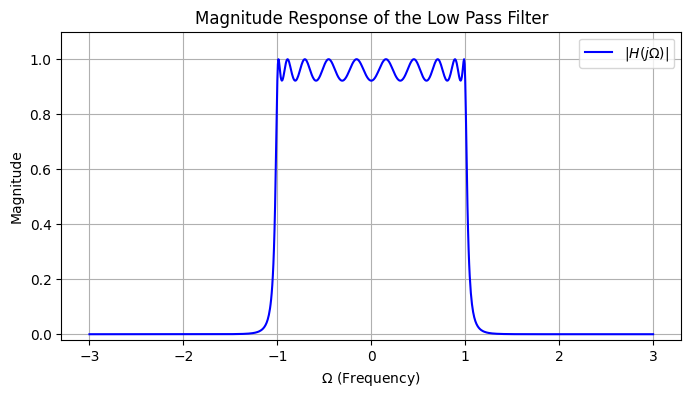

In [17]:
from numpy.polynomial import Polynomial
from sympy import symbols, Poly, Abs, lambdify, I
poly = Polynomial([1.0])
for pole in stable_poles:
    poly *= Polynomial([-pole, 1.0])
s, Omega = symbols('s Omega')
product_neg_poles = np.product([-pole for pole in stable_poles])
poly = Polynomial([1.0])
for pole in stable_poles:
    poly *= Polynomial([-pole, 1.0])
numerator = product_neg_poles*(1/np.sqrt(1+Epsilon**2))
denominator = Poly(poly.coef[::-1], s).as_expr()
transfer_function = numerator / denominator
print(transfer_function)
H_omega = transfer_function.subs(s, I * Omega)
H_magnitude = Abs(H_omega)
H_func = lambdify(Omega, H_magnitude, modules="numpy")
W_values = np.linspace(-3, 3, 1000)
mag_values = H_func(W_values)
plt.figure(figsize=(8, 4))
plt.plot(W_values, mag_values, label=r'$|H(j\Omega)|$', color='b')
plt.xlabel(r'$\Omega$ (Frequency)')
plt.ylabel('Magnitude')
plt.ylim(-0.02, 1.1)
plt.title('Magnitude Response of the Low Pass Filter')
plt.grid(True)
plt.legend()
plt.show()

$ H_{\text{analog, LPF}}(s) $, $ H_{\text{analog, BPF}}(s)$ , and $ H_{\text{analog, BPF}}(\Omega) $

$$
\Omega_L = \frac{\Omega^2 - \Omega_0^2}{B \Omega}
$$

#### From analytic continuation  
$$
\Omega = \frac{s}{j}, \quad \Omega_L = \frac{s_L}{j}
$$

$$
\frac{s_L}{j} = \frac{(s/j)^2 - \Omega_0^2}{B s / j}
$$

$$
\Rightarrow s_L = \frac{s^2 + \Omega_0^2}{B s}
$$
The transformation should satisfy the following criteria to be a valid frequency transformation         
1. The transformation should be *rational*
2. *Imaginary axis* of first filter should be *mapped to the imaginary axis* of the transformed filter
3. The *stability should be preserved* i.e. the LHP and RHP of s should be mapped the the LHP and RHP of $s_{l}$ resp. The real part of s and $s_{l}$ should have same sign

Justification for this transformation approach:


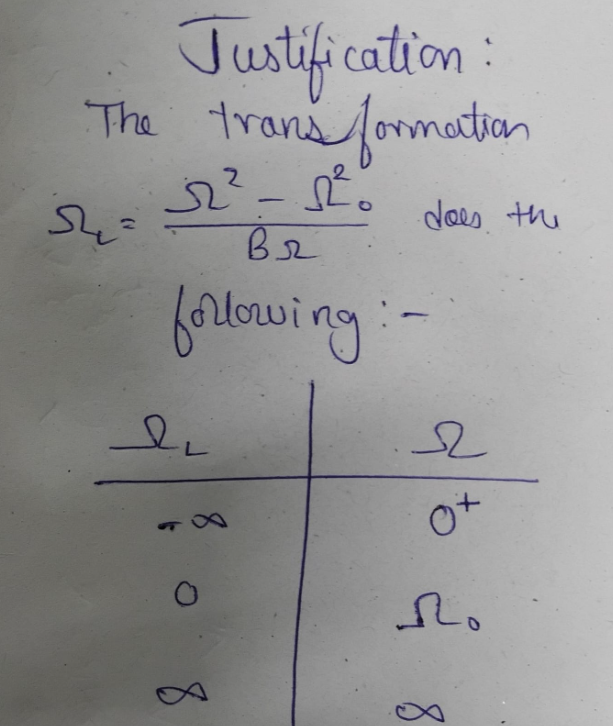

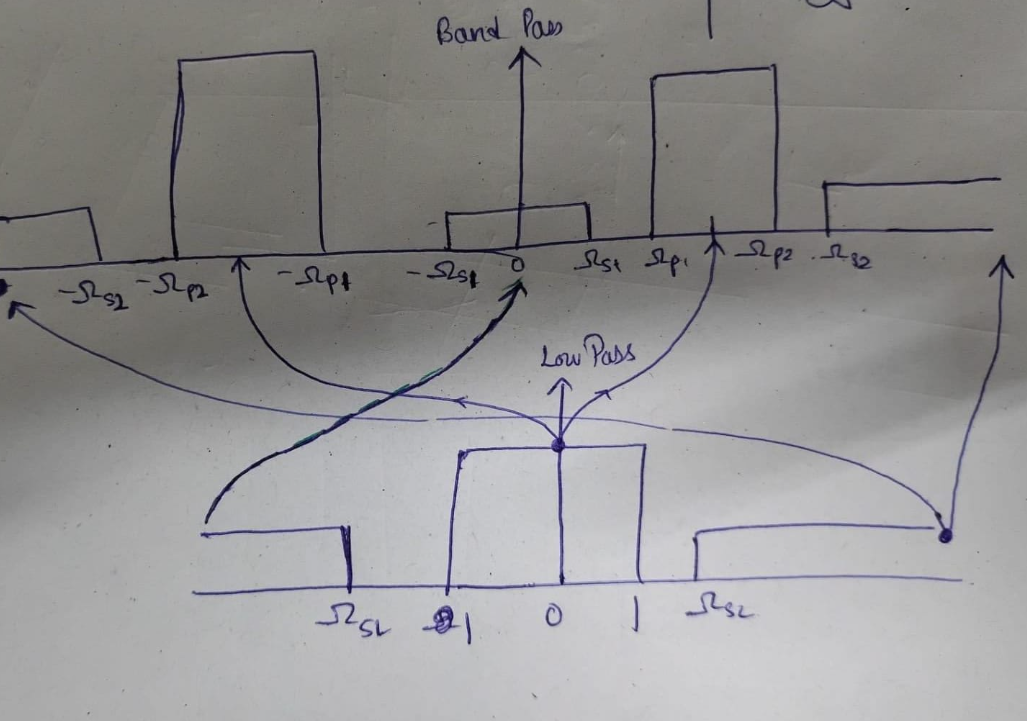


Bandpass Filter Transfer Function:
s**10*(0.00465089962853737 + 8.19700210485941e-18*I)/(s**10*(0.00504435968388001 + 8.89045781438114e-18*I) + 0.680736331917372*s**9*(0.0414060740830247 + 6.93889390390723e-17*I)*(s**2 + 0.939346045974123) + 0.463401953592319*s**8*(0.207750123789674 + 2.98372437868011e-16*I)*(s**2 + 0.939346045974123)**2 + 0.31545454609178*s**7*(0.536853316668658 + 8.60422844084496e-16*I)*(s**2 + 0.939346045974123)**3 + 0.214741370593178*s**6*(1.37642479081273 + 1.33226762955019e-15*I)*(s**2 + 0.939346045974123)**4 + 0.146182252928509*s**5*(1.86956598968533 + 3.33066907387547e-15*I)*(s**2 + 0.939346045974123)**5 + 0.0995115706499708*s**4*(3.19785191054288 + 3.5527136788005e-15*I)*(s**2 + 0.939346045974123)**6 + 0.0677411415875976*s**3*(2.40403742012023 + 4.44089209850063e-15*I)*(s**2 + 0.939346045974123)**7 + 0.0461138562442366*s**2*(3.02899926524092 + 8.88178419700125e-16*I)*(s**2 + 0.939346045974123)**8 + 0.0313913773502666*s*(1.02859055531433 + 8.88178419700125e-16

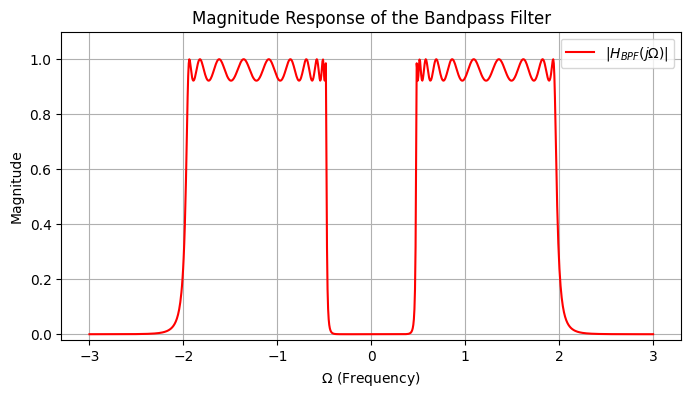

In [18]:
from sympy import simplify
H_analog_BPF = transfer_function.subs(s, (s**2 + pb1_Omega_sq) / (pb1_B * s))
H_analog_BPF = simplify(H_analog_BPF)

print("\nBandpass Filter Transfer Function:")
print(H_analog_BPF)

H_analog_BPF_omega = simplify(H_analog_BPF.subs(s, I * Omega))

print("\nBandpass Filter Transfer Function (Frequency Domain):")
print(H_analog_BPF_omega)
H_func_BPF = lambdify(Omega, Abs(H_analog_BPF_omega), modules="numpy")
W_values = np.linspace(-3, 3, 1000)
mag_values_BPF = H_func_BPF(W_values)
plt.figure(figsize=(8, 4))
plt.plot(W_values, mag_values_BPF, label=r'$|H_{BPF}(j\Omega)|$', color='r')
plt.xlabel(r'$\Omega$ (Frequency)')
plt.ylim(-0.02,1.1)
plt.ylabel('Magnitude')
plt.title('Magnitude Response of the Bandpass Filter')
plt.grid(True)
plt.legend()
plt.show()

# BANDSTOP FILTER

In [19]:
bs_p1 = Omega3[13]
bs_p2 = Omega3[16]
bs_s1 = Omega3[14]
bs_s2 = Omega3[15]
bs_Omega_sq = bs_p1*bs_p2
bs_B = (bs_p2-bs_p1)
bs_ls1 = (bs_s1**2 - bs_Omega_sq)/(bs_B*bs_s1)
bs_ls2 = (bs_s2**2 - bs_Omega_sq)/(bs_B*bs_s2)
print("Omega_sqared = ",bs_Omega_sq)
print("B = ",bs_B)
print('Ω LS1=',bs_ls1)
print('Ω LS2=',bs_ls2)

Omega_sqared =  0.9483099953849536
B =  0.7091268454434455
Ω LS1= -0.8462066391530495
Ω LS2= 0.8487429433540321


In [20]:
LP2_stop = min(abs(bs_ls1),abs(bs_ls2))
print("stopband edge for Low pass is ",LP2_stop)
LP2_pass = 1
tol = 0.078
D1 = 1/(1-tol)**2 -1
D2 = 1/tol**2 -1
print("The value of D1 is",D1)
print("The value of D2 is",D2)

stopband edge for Low pass is  0.8462066391530495
The value of D1 is 0.1763543367478977
The value of D2 is 163.3655489809336


In [21]:
import numpy as np
N = int(np.ceil(np.arccosh(np.sqrt(D2/D1))/(np.arccos(LP2_stop/LP2_pass))))
print('N_min = ',N)

N_min =  8


In [22]:
Epsilon = math.sqrt(D1)
print("Epsilon =",Epsilon)

Epsilon = 0.4199456354671372


In [23]:
poles = [LP2_pass*math.sin((2*k+1)*np.pi/(2*N))*math.sinh((1/N)*np.arcsinh(1/Epsilon)) + 1j*LP2_pass*math.cos((2*k+1)*np.pi/(2*N))*math.cosh((1/N)*np.arcsinh(1/Epsilon)) for k in range(2*N)]

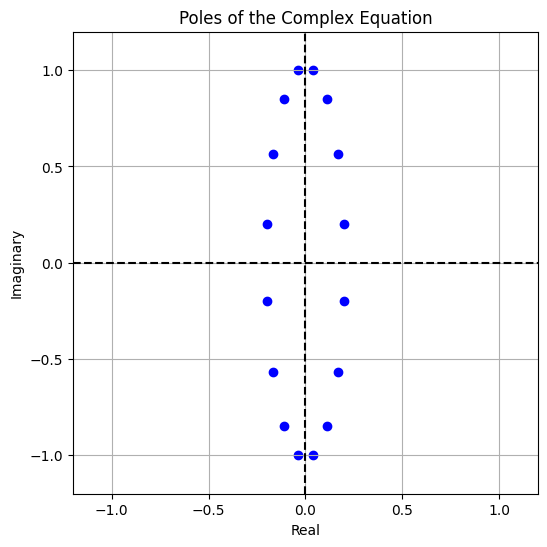

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(np.real(poles), np.imag(poles), color='blue', marker='o')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Poles of the Complex Equation')
plt.grid(True)
plt.show()
stable_poles = [pole for pole in poles if np.real(pole) < 0]

(0.0186035985141495 + 2.63903482400352e-17*I)/(1.0*s**8 + s**7*(1.03345640193969 + 8.88178419700125e-16*I) + s**6*(2.53401606735506 + 1.22124532708767e-15*I) + s**5*(1.89686680785906 + 3.33066907387547e-15*I) + s**4*(1.99971043140204 + 1.66533453693773e-15*I) + s**3*(0.991120598111362 + 1.11022302462516e-15*I) + s**2*(0.506033407360905 + 5.27355936696949e-16*I) + s*(0.128509401019156 + 2.0122792321331e-16*I) + 0.0201774387355201 + 2.86229373536173e-17*I)


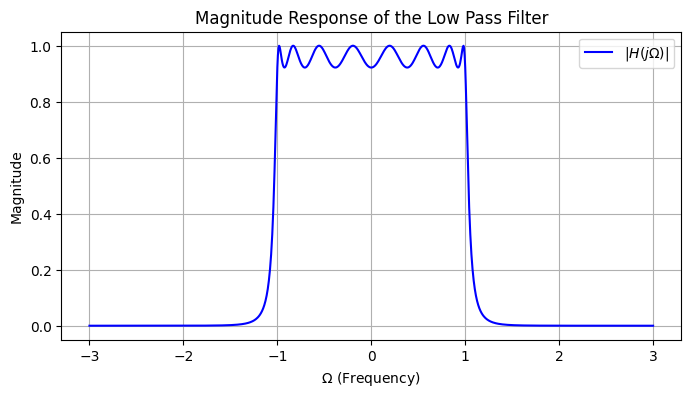

In [25]:
from numpy.polynomial import Polynomial
from sympy import symbols, Poly, Abs, lambdify, I
poly = Polynomial([1.0])
for pole in stable_poles:
    poly *= Polynomial([-pole, 1.0])
s, Omega = symbols('s Omega')
product_neg_poles = np.product([-pole for pole in stable_poles])
poly = Polynomial([1.0])
for pole in stable_poles:
    poly *= Polynomial([-pole, 1.0])
numerator = product_neg_poles*(1/np.sqrt(1+Epsilon**2))
denominator = Poly(poly.coef[::-1], s).as_expr()
transfer_function = numerator / denominator
print(transfer_function)
H_omega = transfer_function.subs(s, I * Omega)
H_magnitude = Abs(H_omega)
H_func = lambdify(Omega, H_magnitude, modules="numpy")
W_values = np.linspace(-3, 3, 1000)
mag_values = H_func(W_values)
plt.figure(figsize=(8, 4))
plt.plot(W_values, mag_values, label=r'$|H(j\Omega)|$', color='b')
plt.xlabel(r'$\Omega$ (Frequency)')
plt.ylabel('Magnitude')
plt.title('Magnitude Response of the Low Pass Filter')
plt.grid(True)
plt.legend()
plt.show()

$ H_{\text{analog, LPF}}(s) $, $ H_{\text{analog, BPF}}(s)$ , and $ H_{\text{analog, BPF}}(\Omega) $

$$
\Omega_L = \frac{B \Omega}{\Omega_0^2 - \Omega^2}
$$

#### From analytic continuation  
$$
\Omega = \frac{s}{j}, \quad \Omega_L = \frac{s_L}{j}
$$

$$
\frac{s_L}{j} = \frac{B s / j}{\Omega_0^2 - (s/j)^2}
$$

$$
\Rightarrow s_L = \frac{Bs}{s^2 + \Omega_0^2}
$$


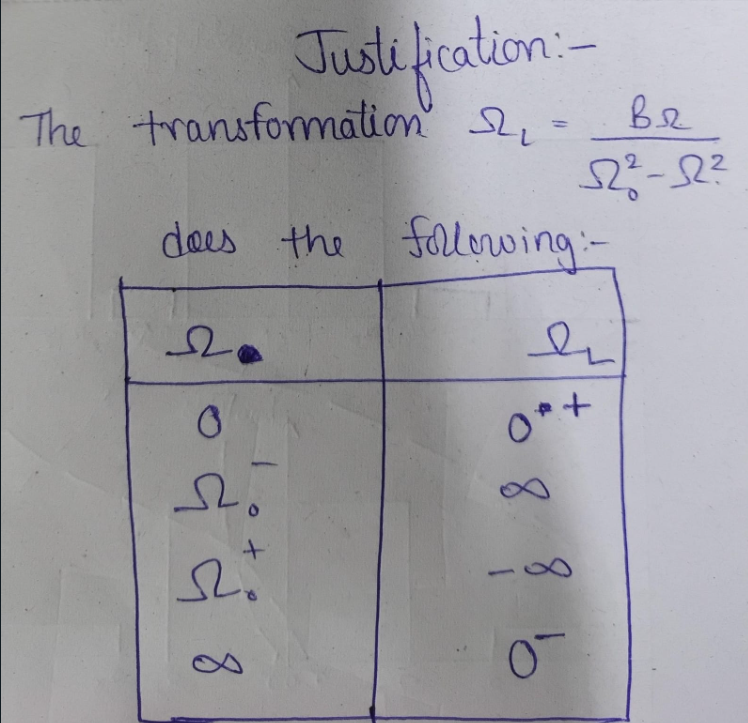

![image.png]()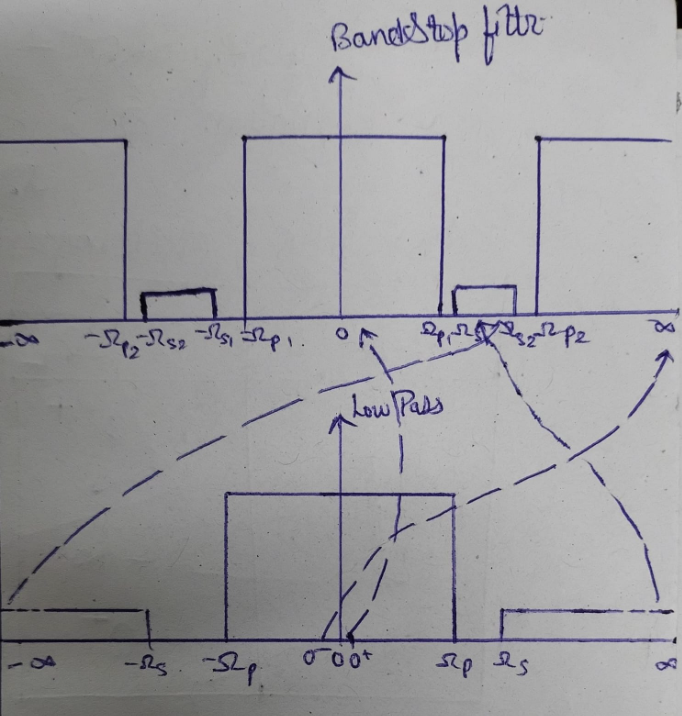


The transformation should satisfy the following criteria to be a valid frequency transformation         
1. The transformation should be *rational*
2. *Imaginary axis* of first filter should be *mapped to the imaginary axis* of the transformed filter
3. The *stability should be preserved* i.e. the LHP and RHP of s should be mapped the the LHP and RHP of $s_{l}$ resp. The real part of s and $s_{l}$ should have same sign


Bandstop Filter Transfer Function:
(0.0186035985141495 + 2.63903482400352e-17*I)*(s**2 + 0.948309995384954)**8/(0.0639427653386285*s**8 + 0.0901711248833663*s**7*(1.03345640193969 + 8.88178419700125e-16*I)*(s**2 + 0.948309995384954) + 0.127157962588454*s**6*(2.53401606735506 + 1.22124532708767e-15*I)*(s**2 + 0.948309995384954)**2 + 0.17931624420302*s**5*(1.89686680785906 + 3.33066907387547e-15*I)*(s**2 + 0.948309995384954)**3 + 0.252869067579703*s**4*(1.99971043140204 + 1.66533453693773e-15*I)*(s**2 + 0.948309995384954)**4 + 0.356592151608044*s**3*(0.991120598111362 + 1.11022302462516e-15*I)*(s**2 + 0.948309995384954)**5 + 0.502860882928572*s**2*(0.506033407360905 + 5.27355936696949e-16*I)*(s**2 + 0.948309995384954)**6 + 0.709126845443446*s*(0.128509401019156 + 2.0122792321331e-16*I)*(s**2 + 0.948309995384954)**7 + (0.0201774387355201 + 2.86229373536173e-17*I)*(s**2 + 0.948309995384954)**8)

Bandstop Filter Transfer Function (Frequency Domain):
(0.0186035985141495 + 2.63903482400352e-

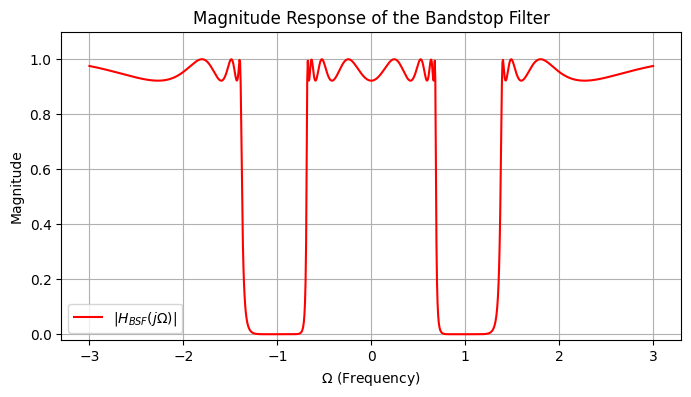

In [26]:
from sympy import simplify
H_analog_BSF = transfer_function.subs(s,  (bs_B * s)/(s**2 + bs_Omega_sq))
H_analog_BSF = simplify(H_analog_BSF)

print("\nBandstop Filter Transfer Function:")
print(H_analog_BSF)

H_analog_BSF_omega = simplify(H_analog_BSF.subs(s, I * Omega))

print("\nBandstop Filter Transfer Function (Frequency Domain):")
print(H_analog_BSF_omega)
H_func_BSF = lambdify(Omega, Abs(H_analog_BSF_omega), modules="numpy")
W_values = np.linspace(-3, 3, 1000)
mag_values_BSF = H_func_BSF(W_values)
plt.figure(figsize=(8, 4))
plt.plot(W_values, mag_values_BSF, label=r'$|H_{BSF}(j\Omega)|$', color='r')
plt.xlabel(r'$\Omega$ (Frequency)')
plt.ylim(-0.02,1.1)
plt.ylabel('Magnitude')
plt.title('Magnitude Response of the Bandstop Filter')
plt.grid(True)
plt.legend()
plt.show()

# Convert to Discrete

In [27]:
from sympy import symbols, simplify
z = symbols('z')
H_digital_BPF = H_analog_BPF.subs(s, (z - 1) / (z + 1))
H_digital_BPF = simplify(H_digital_BPF)
print("\nDigital Bandpass Filter Transfer Function:")
print(H_digital_BPF)
H_digital_BSF = H_analog_BSF.subs(s, (z - 1) / (z + 1))
H_digital_BSF = simplify(H_digital_BSF)
print("\nDigital Bandstop Filter Transfer Function:")
print(H_digital_BSF)


Digital Bandpass Filter Transfer Function:
(z**20*(0.00465089962853737 + 8.19700210485941e-18*I) - z**18*(0.0465089962853737 + 8.19700210485941e-17*I) + z**16*(0.209290483284182 + 3.68865094718673e-16*I) - z**14*(0.558107955424485 + 9.83640252583129e-16*I) + z**12*(0.976688921992849 + 1.72137044202048e-15*I) - z**10*(1.17202670639142 + 2.06564453042457e-15*I) + z**8*(0.976688921992849 + 1.72137044202048e-15*I) - z**6*(0.558107955424485 + 9.83640252583129e-16*I) + z**4*(0.209290483284182 + 3.68865094718673e-16*I) - z**2*(0.0465089962853737 + 8.19700210485941e-17*I) + 0.00465089962853737 + 8.19700210485941e-18*I)/(z**20*(103.630114355334 + 8.88672152504458e-14*I) - z**19*(48.48218762055 + 3.64741049674814e-14*I) + z**18*(524.305578552293 + 2.84267704301311e-13*I) - z**17*(232.641086707651 + 1.02123434062788e-13*I) + z**16*(1432.34166401939 + 3.88313803295755e-13*I) - z**15*(588.929925910952 + 1.15665035927107e-13*I) + z**14*(2632.23506537307 + 2.39921599017925e-13*I) - z**13*(986.450672

In [28]:
H_final_analog_omega = simplify(H_analog_BPF * H_analog_BSF)
H_final_z = simplify(H_digital_BPF+H_digital_BSF)

In [29]:
print('H_final_analog(Omega):')
print(H_final_analog_omega)
print()
print('H_final(z):')
print(H_final_z)
print()

H_final_analog(Omega):
s**10*(0.00465089962853737 + 8.19700210485941e-18*I)*(0.0186035985141495 + 2.63903482400352e-17*I)*(s**2 + 0.948309995384954)**8/((0.0639427653386285*s**8 + 0.0901711248833663*s**7*(1.03345640193969 + 8.88178419700125e-16*I)*(s**2 + 0.948309995384954) + 0.127157962588454*s**6*(2.53401606735506 + 1.22124532708767e-15*I)*(s**2 + 0.948309995384954)**2 + 0.17931624420302*s**5*(1.89686680785906 + 3.33066907387547e-15*I)*(s**2 + 0.948309995384954)**3 + 0.252869067579703*s**4*(1.99971043140204 + 1.66533453693773e-15*I)*(s**2 + 0.948309995384954)**4 + 0.356592151608044*s**3*(0.991120598111362 + 1.11022302462516e-15*I)*(s**2 + 0.948309995384954)**5 + 0.502860882928572*s**2*(0.506033407360905 + 5.27355936696949e-16*I)*(s**2 + 0.948309995384954)**6 + 0.709126845443446*s*(0.128509401019156 + 2.0122792321331e-16*I)*(s**2 + 0.948309995384954)**7 + (0.0201774387355201 + 2.86229373536173e-17*I)*(s**2 + 0.948309995384954)**8)*(s**10*(0.00504435968388001 + 8.89045781438114e-18*I) 

# Coefficients

In [32]:
def get_coefficients(H, var):
    num, den = H.as_numer_denom()
    num_coeffs = Poly(num, var).all_coeffs()
    den_coeffs = Poly(den, var).all_coeffs()
    return num_coeffs, den_coeffs

# Extract coefficients for the bandstop filter
num_BSF, den_BSF = get_coefficients(H_analog_BSF, s)
num_BPF, den_BPF = get_coefficients(H_analog_BPF, s)
print("\nAnalog BandPass Filter Coefficients:")
print("Numerator Coefficients:", num_BPF)
print("Denominator Coefficients:", den_BPF)
print("\nAnalog Bandstop Filter Coefficients:")
print("Numerator Coefficients:", num_BSF)
print("Denominator Coefficients:", den_BSF)


Analog BandPass Filter Coefficients:
Numerator Coefficients: [0.00465089962853737 + 8.19700210485941e-18*I, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Denominator Coefficients: [0.0213692510712546, 0.0322888742607925 + 2.78811439271701e-17*I, 0.340410051673331 + 4.09573319652848e-17*I, 0.435826076550727 + 5.36541481166778e-16*I, 2.21637969884517 + 6.61320980928992e-16*I, 2.36978719640788 + 3.35063069837496e-15*I, 7.6654982797618 + 3.29055723367142e-15*I, 6.71864059914927 + 1.0073711836353e-14*I, 15.3959215880829 + 7.79354088493118e-15*I, 10.8088061152786 + 1.6570467313519e-14*I, 18.5768990639703 + 9.87606661422287e-15*I, 10.1532092860878 + 1.55654029508975e-14*I, 13.5849146365656 + 6.8767944180961e-15*I, 5.56875671170867 + 8.34961322497484e-15*I, 5.96819269824257 + 2.561957349465e-15*I, 1.73315500964508 + 2.45049951707126e-15*I, 1.52264209890089 + 4.54324305069922e-16*I, 0.281249975266826 + 3.4624426216548e-16*I, 0.206351328130356 + 2.48277035480223e-17*I, 0.0183858371178631 + 1.58760000972566e-17

In [33]:
num_d, den_d = get_coefficients(H_final_z, z)
print("\nAnalog BandPass Filter Coefficients:")
print("Numerator Coefficients:", num_d)
print("Denominator Coefficients:", den_d)


Analog BandPass Filter Coefficients:
Numerator Coefficients: [400.492746391776 + 9.11715745860703e-13*I, -357.235814058088 - 7.93449937581305e-13*I, 5336.71429243583 + 1.14989814871858e-11*I, -4463.26962010863 - 9.35216534869489e-12*I, 34233.322739064 + 6.92984769529983e-11*I, -26834.9649834084 - 5.26962094588015e-11*I, 140727.050197576 + 2.66184998478429e-10*I, -103397.31050427 - 1.89615268999643e-10*I, 417037.673096372 + 7.36443032971766e-10*I, -286805.377091127 - 4.91841428540394e-10*I, 947992.768480947 + 1.56954966882044e-9*I, -608877.684333577 - 9.82632356776066e-10*I, 1715907.90324051 + 2.68731092960961e-9*I, -1025786.82790273 - 1.57334661751813e-9*I, 2531106.25237965 + 3.79059061791615e-9*I, -1401868.60868958 - 2.06439394277271e-9*I, 3086328.56264375 + 4.46014621994259e-9*I, -1574010.85964123 - 2.24028187671897e-9*I, 3134894.71527796 + 4.38789454625337e-9*I, -1460456.56128713 - 2.00960382158022e-9*I, 2658893.09419463 + 3.59158936274029e-9*I, -1119745.99621369 - 1.47891800727319

In [ ]:
H_analog_final_omega = simplify(H_final_analog_omega.subs(s, I * Omega))

#EVIDEMCE OF CORRECTNESS

In [ ]:
H_func_final = lambdify(Omega, Abs(H_analog_final_omega), modules="numpy")
W_values = np.linspace(-3, 3, 1000)
mag_values_final = H_func_final(W_values)
plt.figure(figsize=(8, 4))
plt.plot(W_values, mag_values_final, label=r'$|H_{BPF}(j\Omega)|$', color='r')
plt.xlabel(r'$\Omega$ (Frequency)')
plt.ylabel('Magnitude')
plt.title('Magnitude Response of the Filter')
plt.ylim(-0.02,1.1)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify

Omega = symbols('Omega')
H_func_BPF = lambdify(Omega, H_analog_final_omega, modules="numpy")
frequencies = np.logspace(-2, 4, 1000)
W_values = 2 * np.pi * frequencies

H_values = H_func_BPF(W_values)
mag_values = np.abs(H_values)
phase_values = np.angle(H_values)
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].semilogx(frequencies, 20 * np.log10(mag_values), label='Magnitude (dB)', color='b')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].set_title('Magnitude Response')
axs[0].grid(which='both', linestyle='--', linewidth=0.5)
axs[0].legend()

axs[1].semilogx(frequencies, np.degrees(phase_values), label='Phase (degrees)', color='r')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Phase (degrees)')
axs[1].set_title('Phase Response')
axs[1].grid(which='both', linestyle='--', linewidth=0.5)
axs[1].legend()

plt.tight_layout()
plt.show()

# COMPARISON WITH BUTTERWORTH FILTER

We realise that for the same tolerance, butterworth filter has a higher N value than chebyschev filter. For getting a tolerance of 0.15 for the bandpass as the butterworth filter, we got a N value of 8. But in chebyschev we get an N value of 7 and 9 for tolerance much less, almost half of that of butterworth filter (0.078). This implies that the Chebyshev filter achieves a steeper roll-off (faster transition from passband to stopband) compared to the Butterworth filter for the same or even lower order N. Chebyshev filters can achieve the same filtering effect as Butterworth with a lower filter order, leading to less computational complexity and fewer components in analog circuits. This is why Chebyshev filters are preferred when narrow transition bands are required. The improved efficiency comes at a cost – Chebyshev filters introduce ripple in the passband, while Butterworth filters have a maximally flat response.